In [7]:
# Allow interactive 3d plot
%matplotlib widget

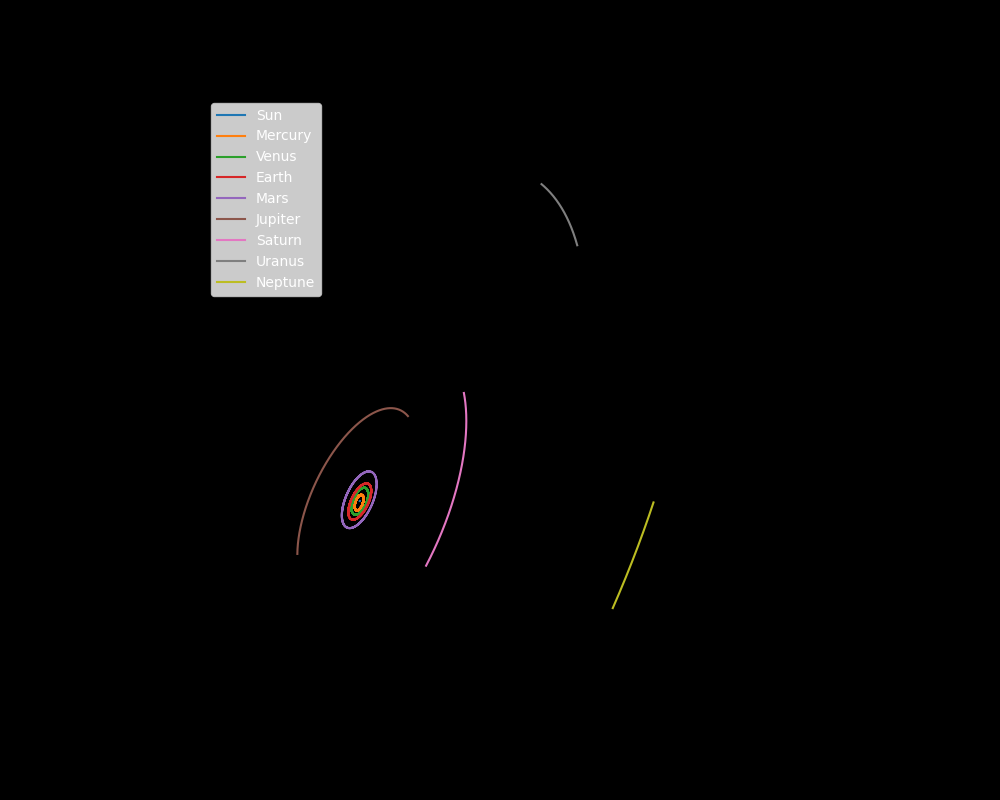

In [8]:
from simulation.runner import run_simulation
from utils.plot_tools import plot_orbits_3d

T = 5 * 365.25 * 24 * 3600  # 5 year
bodies, solution = run_simulation(T, steps=1000)

# Plots orbital path of planet
plot_orbits_3d(bodies)